In [ ]:
# Importing Libraries
# importing numpy and pandas for data processing and wrangling
import numpy as np
import pandas as pd

# importing tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# library used for ML model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Load Dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
dup = df.duplicated().sum()
print(f'number of duplicated rows: {dup}')

number of duplicated rows: 0


In [6]:
# dont need first column
data = df.iloc[:,1:]
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


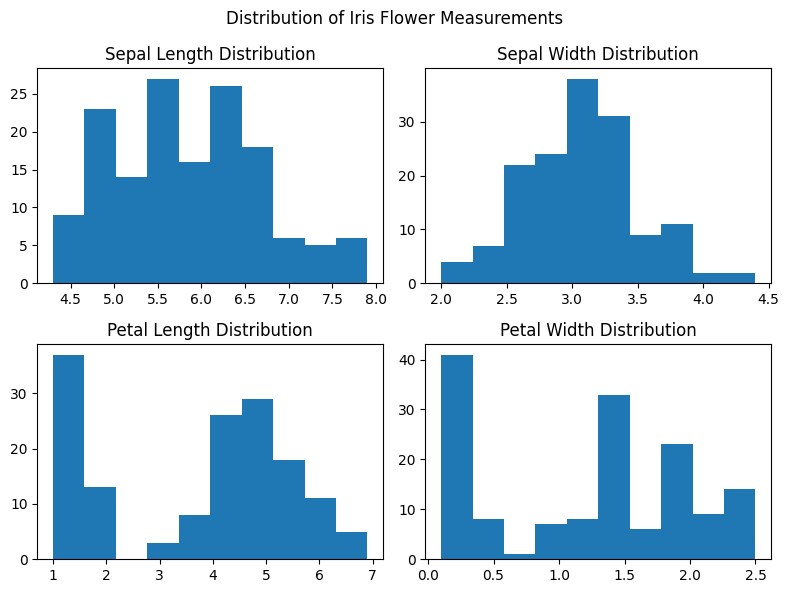

In [7]:
# Data Visualization
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements')

plt.subplot(2, 2, 1)
plt.hist(data['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)
plt.hist(data['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)
plt.hist(data['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)
plt.hist(data['PetalWidthCm'])
plt.title('Petal Width Distribution')

plt.tight_layout()
plt.show()

In [10]:
# Sepal Length vs. Width
colors = ['red', 'blue', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

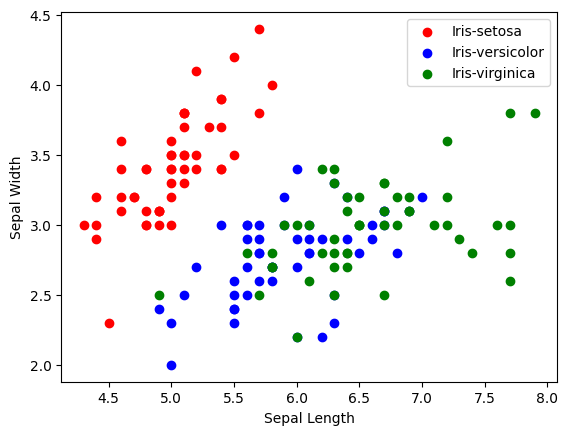

In [11]:
# scatter plot of length vs. width for sepal species
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.legend()
plt.show()

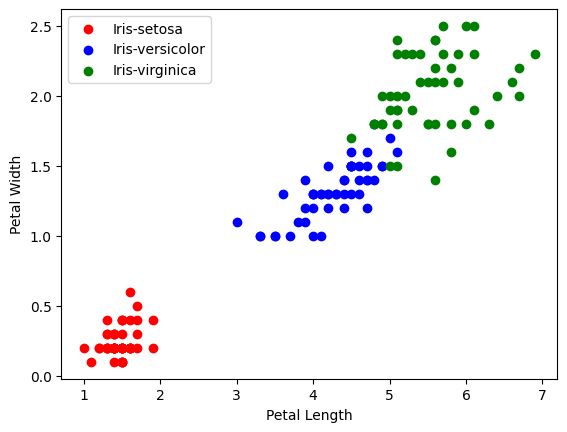

In [12]:
# scatter plot of length vs. width for petal species
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.legend()
plt.show()

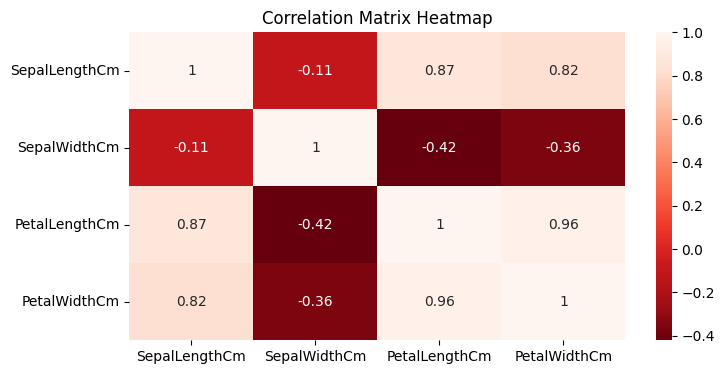

In [15]:
# Correlation Matrix
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
# Feature Engineering
# categorical encoding
le = LabelEncoder()

data['Species'] = le.fit_transform(data['Species'])

unique_species = data['Species'].unique()

print('Encoded Species Values:')
print(unique_species)

Encoded Species Values:
[0 1 2]


In [17]:
# defining X and y
x = data.drop(columns=['Species'], axis=1)
y = data['Species']

In [18]:
# data splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
y_train.value_counts()

Species
2    41
0    32
1    32
Name: count, dtype: int64

In [19]:
# ML Model Implementation
def evaluate_model(model, x_train, x_test, y_train, y_test):
    # fit the model to the training data
    model.fit(x_train, y_train)

    # make predictions on test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrices
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11, 4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap='Oranges', fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap='Oranges', fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()

    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test]
    return model_score

In [20]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])


Confusion Matrix:


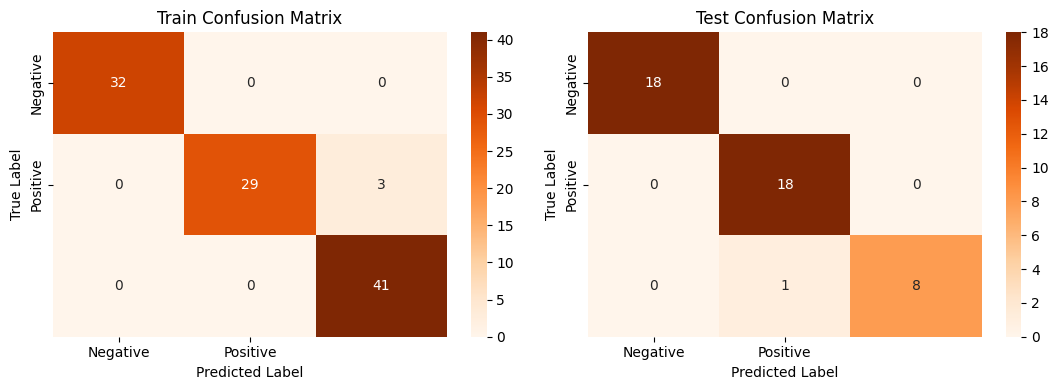


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  32        |
| 1            |    1        | 0.90625  |   0.95082  |  32        |
| 2            |    0.931818 | 1        |   0.964706 |  41        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.977273 | 0.96875  |   0.971842 | 105        |
| weighted avg |    0.973377 | 0.971429 |   0.97123  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 18        |
| 1            |    0.947368 | 1        |   0.972973 | 18        |
| 2            |    1        | 0.888889 |   0.941176 |  9        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [23]:
# 1 - Logistic Regression
# hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001], 'penalty': ['l1', 'l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# initialize model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)

# select best params
best_params = grid.best_params_
lr_model = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver=best_params['solver'], max_iter=10000, random_state=0)
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)
score['Logistic regression tuned'] = lr_score